<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#utility" data-toc-modified-id="utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>utility</a></span></li><li><span><a href="#hit_type" data-toc-modified-id="hit_type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hit_type</a></span></li></ul></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.database import *

import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import multiprocessing

Using TensorFlow backend.


In [3]:
pd.DataFrame(data={
    'drummer_name': get_all_drummers()
})

,drummer_name
0,aaaaa
1,carolyn
2,cuxi
3,fatfat
4,eve
5,oliver
6,chris
7,sheep
8,howeverover
9,celiven


In [4]:
create_all_drummer_profiles()

100%|██████████| 12/12 [00:00<00:00, 40.10it/s]


In [5]:
pfs = []
with multiprocessing.Pool() as p:
    drummers = get_all_drummers()
    for id_, pf in tqdm(enumerate(p.imap(get_profile, drummers)), total=len(drummers)):
        pf['who'] = id_
        pfs.append(pf)
        
pf = pd.concat(pfs, ignore_index=True)
# pf['hit_type'] = pf['hit_type'].transform(transform_hit_type)
pf

100%|██████████| 12/12 [00:00<00:00, 193.55it/s]


,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_MMI,L_G_MMI,...,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type,who
0,1.0806,6.1168,0.2594,0.9863,0.3257,2.8363,-5.2350,0.8554,1.1058,5.3705,...,20.9961,15.9058,-0.6893,0.9130,-0.8665,0.8937,0.3618,0.7337,1,0
1,1.1590,4.8228,0.2256,0.9915,0.5427,2.7552,-0.8518,0.2664,1.1572,5.0931,...,79.8585,12.0606,-0.1998,0.8271,0.1045,0.9976,0.9044,0.9303,1,0
2,1.1551,6.6001,0.1999,0.9648,0.5925,3.1437,5.2923,0.6164,1.1724,6.4359,...,60.0159,13.2568,-0.5421,-0.3645,-0.4121,0.9831,0.9211,0.8842,1,0
3,1.2271,8.1164,0.0268,1.0970,0.4790,3.5718,7.0257,0.5136,1.2202,8.7604,...,32.5196,17.3706,-0.8871,0.9642,-0.7826,0.6944,0.5638,-0.1882,1,0
4,1.2347,7.3739,-0.0564,1.1779,0.3334,4.6384,0.9268,0.3256,1.2568,7.5382,...,53.4668,49.2676,-0.9816,0.8613,-0.7726,0.9375,0.8315,0.9704,1,0
5,1.1509,9.4606,0.1247,1.1168,0.2165,5.2979,-7.1430,-1.5216,1.1694,9.8042,...,12.9059,83.4412,-0.9294,-0.7444,0.6339,0.5271,0.4365,0.9943,1,0
6,1.1115,10.1234,0.2182,1.0113,0.3178,4.6366,-6.9199,-4.6546,1.1084,9.7788,...,81.6193,118.2435,-0.7082,0.1154,0.1799,-0.0566,-0.7340,0.7189,1,0
7,1.1540,8.3420,0.0348,0.9564,0.5761,4.4739,-4.3192,-5.0928,1.1417,8.1882,...,240.7990,68.0297,-0.8936,0.8946,-0.9551,0.9758,-0.6020,-0.4151,1,0
8,1.1079,7.3399,-0.0050,0.8303,0.6463,5.3733,-2.5537,-1.4920,1.1496,7.5060,...,193.6889,293.2648,0.0586,0.8145,-0.4415,0.8869,-0.6183,-0.2538,1,0
9,0.9632,9.8419,0.1227,0.6370,0.5808,7.1619,4.8617,-0.1145,0.9346,8.4450,...,601.0376,323.4801,0.2248,0.4338,-0.6138,0.9815,-0.3539,-0.3113,1,0


# LGBM training

## utility

In [6]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

## hit_type

In [9]:
train_df = pf.drop('who', axis=1).copy()

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

10416    2
4903     4
11939    4
9728     6
12910    1
1258     2
9722     6
6124     3
13742    6
880      0
12061    5
13107    2
8977     3
182      4
11090    0
13442    4
1484     3
9262     4
6754     7
1965     6
13364    4
995      7
1306     2
5562     0
13725    5
11932    4
4727     3
612      3
1985     6
10651    3
        ..
9330     4
1871     6
547      2
10036    0
10658    4
1687     5
11668    3
1345     3
5193     5
13400    4
7654     5
10047    7
1659     4
6543     6
2215     7
13888    6
4831     3
6309     4
6935     1
7473     4
6544     6
13463    4
1128     1
739      5
7070     1
6212     4
4967     4
9078     4
2710     5
1789     5
Name: hit_type, Length: 5665, dtype: int64

In [10]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 3,
    'num_leaves': 2 ** 3,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=500, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.719619
[10]	valid_0's f1-score: 0.751462
[15]	valid_0's f1-score: 0.774098
[20]	valid_0's f1-score: 0.80356
[25]	valid_0's f1-score: 0.824626
[30]	valid_0's f1-score: 0.840984
[35]	valid_0's f1-score: 0.852032
[40]	valid_0's f1-score: 0.861059
[45]	valid_0's f1-score: 0.870684
[50]	valid_0's f1-score: 0.879006
[55]	valid_0's f1-score: 0.883817
[60]	valid_0's f1-score: 0.88816
[65]	valid_0's f1-score: 0.892626
[70]	valid_0's f1-score: 0.898109
[75]	valid_0's f1-score: 0.899796
[80]	valid_0's f1-score: 0.901488
[85]	valid_0's f1-score: 0.903537
[90]	valid_0's f1-score: 0.906723
[95]	valid_0's f1-score: 0.909589
[100]	valid_0's f1-score: 0.911915
[105]	valid_0's f1-score: 0.912634
[110]	valid_0's f1-score: 0.914592
[115]	valid_0's f1-score: 0.914729
[120]	valid_0's f1-score: 0.916959
[125]	valid_0's f1-score: 0.917596
[130]	valid_0's f1-score: 0.917984
[135]	valid_0's f1-score: 0.919032
[140]	valid_0'

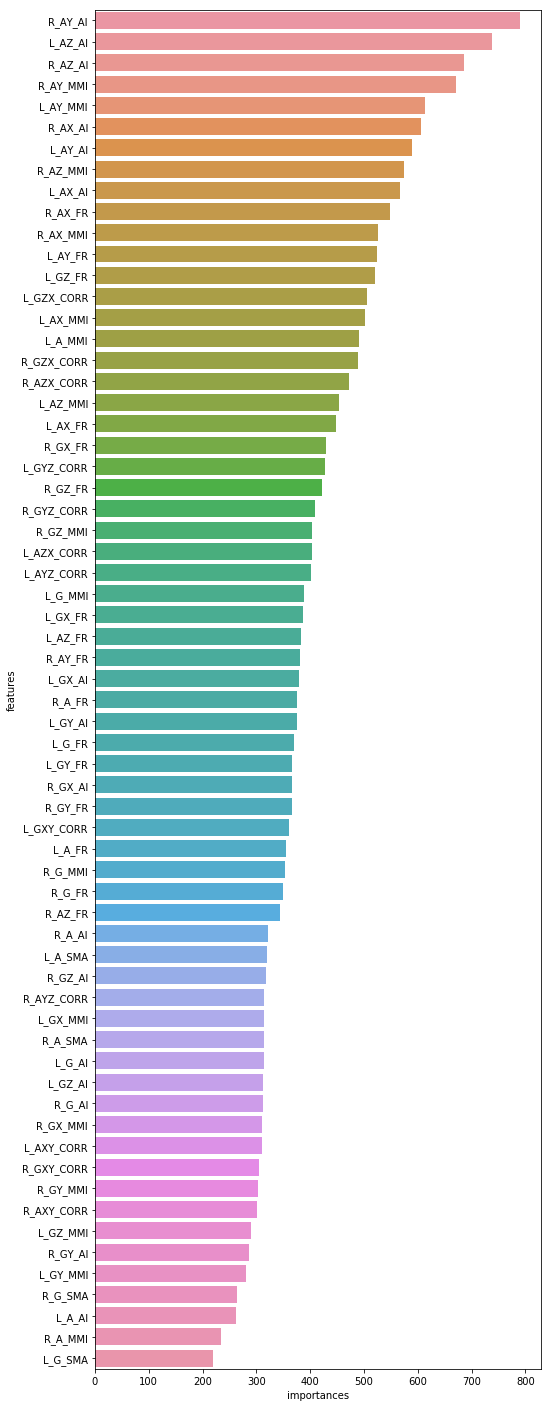

In [11]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [12]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        print(x)
#     y_preds.append(pd.Series(data=predictions))

[1.99686666e-10 2.74588626e-06 3.75096501e-09 9.99997075e-01
 7.26391667e-15 2.56620340e-11 1.69091175e-07 5.83150275e-09]
[2.65894967e-05 4.95507752e-09 1.07726878e-04 9.40565135e-07
 9.99689989e-01 3.42394555e-06 1.61893860e-04 9.43090012e-06]
[1.05880904e-07 9.24792719e-07 1.79174124e-05 7.19822074e-06
 1.24508430e-03 9.88420653e-01 1.03012565e-02 6.86002564e-06]
[4.32845746e-08 6.32034438e-06 2.08103217e-07 1.80639220e-04
 3.46940019e-04 8.54428500e-01 1.39564251e-01 5.47309765e-03]
[4.14611707e-08 9.99874662e-01 2.62025109e-10 1.24281175e-04
 4.51352808e-14 4.72653274e-10 2.16659424e-10 1.01408127e-06]
[2.59447218e-10 6.77311769e-08 1.38184863e-08 5.05428251e-05
 1.33800014e-06 6.03123554e-03 9.93916799e-01 2.92241687e-09]
[4.10253050e-10 3.32616126e-08 1.94010386e-11 2.27750595e-08
 1.51357915e-06 3.13774896e-03 9.51980460e-01 4.48802210e-02]
[5.37308264e-09 1.19060806e-06 9.53962856e-05 2.30676535e-08
 3.30498021e-08 9.97497528e-01 1.11520474e-05 2.39467180e-03]
[4.47819575e-09 

 9.99421160e-01 4.57287931e-10 9.65951122e-09 2.25383429e-07]
[3.52227578e-06 2.49042051e-10 9.99667676e-01 4.04942954e-09
 2.02653743e-04 1.77913614e-06 2.97871707e-06 1.21385685e-04]
[3.40783735e-08 2.56863339e-03 1.35912065e-10 9.97315153e-01
 7.10827789e-11 1.64194948e-06 2.00253724e-06 1.12534405e-04]
[1.36606845e-07 2.02850664e-02 4.19308437e-05 9.78931485e-01
 1.45552802e-06 3.00885012e-05 2.56265885e-04 4.53571290e-04]
[6.32094216e-12 9.87635991e-09 1.17282196e-10 4.93022401e-11
 3.12830175e-09 5.83824961e-05 6.21374966e-08 9.99941542e-01]
[4.04519020e-12 1.27232372e-10 9.83201502e-01 2.06742989e-09
 1.67875413e-02 1.82104479e-06 2.26884356e-07 8.90636848e-06]
[3.55108792e-06 2.28892661e-03 2.81405931e-09 9.97687384e-01
 7.80641100e-11 9.19070067e-07 1.92089956e-05 6.98905904e-09]
[9.69317549e-09 1.05028726e-06 4.57557228e-09 1.00449202e-05
 7.56625939e-07 1.70281841e-05 9.99941131e-01 2.99744730e-05]
[4.35305773e-09 2.57545403e-09 5.40527403e-05 1.04945449e-08
 9.99945552e-01 

 1.96580799e-10 6.77841429e-02 9.32202301e-01 2.60268405e-06]
[1.24844127e-06 2.91569933e-10 1.52056298e-03 3.75396404e-08
 9.98475084e-01 2.99141353e-07 2.37969585e-06 3.88174273e-07]
[7.01253651e-15 7.36100052e-09 3.25403587e-12 2.14879774e-13
 5.11359698e-12 1.78517695e-06 9.91670025e-07 9.99997216e-01]
[2.27377788e-10 4.39829703e-11 9.99996032e-01 2.15164436e-12
 3.73452279e-09 1.19869976e-08 1.04966096e-11 3.95183357e-06]
[5.95532836e-09 1.30769109e-10 9.99999689e-01 5.21185117e-11
 6.67200339e-09 2.31098310e-08 2.23699042e-10 2.74939767e-07]
[5.39942193e-13 3.60997366e-08 1.41288139e-11 1.57216506e-10
 1.22729100e-09 7.61626489e-05 9.99921558e-01 2.24180806e-06]
[9.03740509e-10 4.04630781e-06 6.40432468e-12 9.99995842e-01
 1.10462169e-11 7.35064642e-08 2.75856819e-08 9.92432608e-09]
[1.00918698e-04 2.25621452e-01 8.72816981e-06 7.73984929e-01
 2.22870194e-06 2.73957552e-04 2.61249253e-06 5.17351199e-06]
[6.77467425e-11 6.45781387e-07 1.02900575e-09 1.61703710e-06
 8.81526929e-09 

 9.99952957e-01 1.21544034e-08 2.94750626e-08 1.96816212e-07]
[5.58636463e-11 1.75741278e-09 1.54391319e-02 5.71526919e-09
 9.84557888e-01 4.99193981e-07 6.69620769e-08 2.40664267e-06]
[9.80124732e-08 2.60215596e-07 4.70150229e-04 3.22525719e-07
 1.45529223e-07 9.98430999e-01 7.38549902e-06 1.09063877e-03]
[5.58471089e-13 5.57659065e-08 1.27283694e-11 1.51398278e-10
 2.22287281e-09 4.05859105e-05 9.99957389e-01 1.96664102e-06]
[2.95912288e-10 2.68149549e-05 5.55818309e-11 9.99971416e-01
 3.01545013e-10 1.38867711e-07 5.76617114e-07 1.05277745e-06]
[1.64839633e-07 1.30037332e-05 4.03825214e-04 5.90984796e-06
 6.09844634e-09 9.18807160e-01 8.00712730e-02 6.98657708e-04]
[9.89642154e-13 7.40609055e-11 3.69196352e-08 3.96374898e-10
 1.53167156e-10 7.27187965e-04 9.99174448e-01 9.83269615e-05]
[9.99998545e-01 7.57425995e-10 8.81273001e-08 1.21991061e-06
 1.39837487e-07 1.05168601e-10 1.41677861e-10 5.99555387e-09]
[6.73343275e-09 5.51647911e-11 5.38338454e-06 2.88073211e-09
 9.99990016e-01 

[9.93154774e-01 2.09328386e-04 5.62309521e-03 9.48874624e-07
 2.10910733e-05 2.63702255e-04 1.12972938e-06 7.25930012e-04]
[6.59986001e-09 1.94348953e-07 9.96938977e-07 8.76973031e-08
 1.75460719e-06 9.90775355e-01 7.41397924e-03 1.80762598e-03]
[9.99999986e-01 5.18078502e-09 7.94654401e-09 6.67469446e-10
 8.64798707e-11 3.65656947e-11 3.79858997e-12 4.45849780e-10]
[1.62460175e-12 1.23828897e-08 4.61437602e-05 1.30197331e-08
 7.81926399e-09 9.93934451e-01 6.01800152e-03 1.37050513e-06]
[2.24687450e-16 9.99990071e-01 2.87116226e-13 9.90257890e-06
 5.50310574e-14 2.21514946e-08 2.45108416e-09 1.38680501e-09]
[1.34541008e-08 5.76061448e-11 8.38449323e-08 1.35566060e-07
 3.10319981e-04 2.03929282e-06 9.99687169e-01 2.38430535e-07]
[6.11999295e-10 6.05278880e-07 4.21933026e-08 3.01863602e-07
 5.07115105e-13 2.63993902e-04 1.13128146e-07 9.99734943e-01]
[3.57126817e-08 1.86056502e-07 9.98602887e-01 9.16393100e-10
 1.38090421e-03 1.27756715e-06 1.45533395e-05 1.55033628e-07]
[2.24417156e-13 

In [13]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.96969697 0.004329   0.         0.         0.004329   0.01731602
  0.004329   0.        ]
 [0.00265252 0.92572944 0.00530504 0.0397878  0.         0.02122016
  0.         0.00530504]
 [0.00265957 0.         0.95478723 0.         0.03457447 0.00797872
  0.         0.        ]
 [0.         0.03430079 0.00263852 0.94986807 0.         0.00263852
  0.01055409 0.        ]
 [0.00265252 0.         0.03713528 0.         0.94429708 0.0132626
  0.00265252 0.        ]
 [0.0078534  0.         0.0026178  0.0026178  0.0026178  0.91099476
  0.05497382 0.01832461]
 [0.         0.         0.         0.0104712  0.         0.04188482
  0.93455497 0.01308901]
 [0.00911854 0.         0.00911854 0.         0.         0.02735562
  0.01519757 0.93920973]]


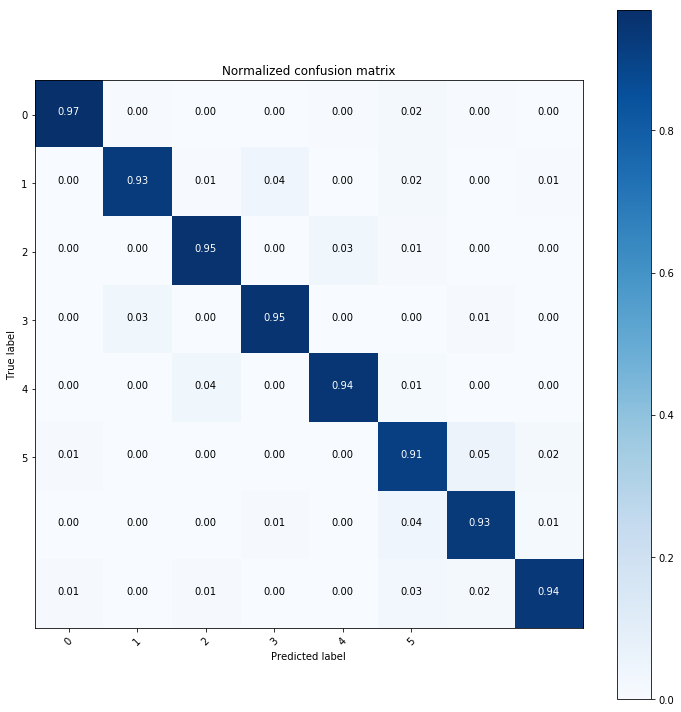

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       231
          1       0.96      0.93      0.94       377
          2       0.94      0.95      0.95       376
          3       0.95      0.95      0.95       379
          4       0.96      0.94      0.95       377
          5       0.88      0.91      0.90       382
          6       0.92      0.93      0.93       382
          7       0.96      0.94      0.95       329

avg / total       0.94      0.94      0.94      2833

0.9412267761305093


In [14]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [15]:
model.save_model('lgbm_model.h5')